In [1]:
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import math
from torch.utils.data.sampler import SubsetRandomSampler

In [2]:
#Convolution Neural Network 
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1,20,5,1)
        self.pool = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(20, 40, 5, 1)
        self.fc1 = nn.Linear(4 * 4 * 40, 500)
        self.fc2 = nn.Linear(500, 10)
        

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 4 * 4 * 40)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


net = Net()


In [3]:
criterion = nn.CrossEntropyLoss() 
optimizer = optim.Adam(net.parameters(), lr=0.001, betas=(0.9,0.99), eps=1e-08, weight_decay=0.001) 

In [4]:
# transforms to apply to the mnist data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# MNIST dataset
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

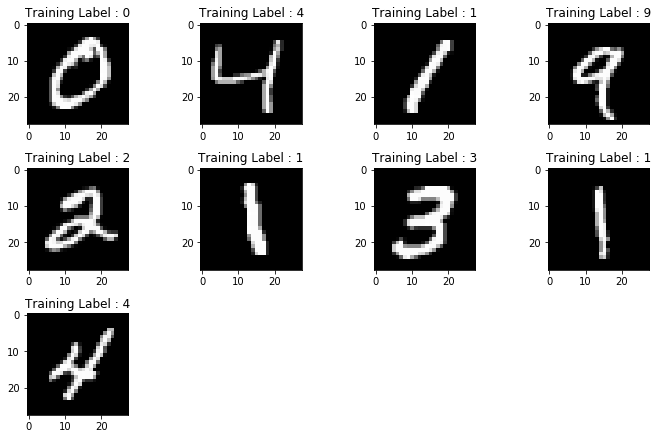

In [5]:
fig = plt.figure(figsize=(10,10));
columns = 4;
rows = 5;
for i in range(1, 10):
    fig.add_subplot(rows, columns, i)
    fig.tight_layout()
    plt.imshow(mnist_trainset.train_data[i].numpy(), cmap='gray')
    plt.title('Training Label : %i' % mnist_trainset.train_labels[i])
plt.show()


In [6]:
num_train = len(mnist_trainset)
indices = list(range(num_train))
#Splitting the Dataset into 10% Training set and 90% Validation Set
split = 54000

# Random, non-contiguous split
validation_idx = np.random.choice(indices, size=split, replace=False)
train_idx = list(set(indices) - set(validation_idx))

# Contiguous split
# train_idx, validation_idx = indices[split:], indices[:split]

## define our samplers -- we use a SubsetRandomSampler because it will return
## a random subset of the split defined by the given indices without replaf
train_sampler = SubsetRandomSampler(train_idx)
validation_sampler = SubsetRandomSampler(validation_idx)

train_load1 = torch.utils.data.DataLoader(mnist_trainset, batch_size=10, sampler=train_sampler)

validation_load1 = torch.utils.data.DataLoader(mnist_trainset, batch_size=10, sampler=validation_sampler)

In [7]:
#CNN on 10% of the Training Dataset
num_epochs = 20
total_step = len(train_load1)
Loss1 = []
print('----------------------------------------------------')
for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_load1, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
    print('Epoch {}  | Loss : {:.4f}'.format(epoch+1, running_loss / total_step))        
    print('----------------------------------------------------')
    Loss1.append(running_loss / total_step)
print('Finished Training')

----------------------------------------------------
Epoch 1  | Loss : 0.3228
----------------------------------------------------
Epoch 2  | Loss : 0.1065
----------------------------------------------------
Epoch 3  | Loss : 0.0802
----------------------------------------------------
Epoch 4  | Loss : 0.0570
----------------------------------------------------
Epoch 5  | Loss : 0.0457
----------------------------------------------------
Epoch 6  | Loss : 0.0495
----------------------------------------------------
Epoch 7  | Loss : 0.0412
----------------------------------------------------
Epoch 8  | Loss : 0.0391
----------------------------------------------------
Epoch 9  | Loss : 0.0322
----------------------------------------------------
Epoch 10  | Loss : 0.0307
----------------------------------------------------
Epoch 11  | Loss : 0.0339
----------------------------------------------------
Epoch 12  | Loss : 0.0253
----------------------------------------------------
Epoch 13

In [8]:
#Accuracy of 90% of the Validation Test Dataset
correct = 0
total = 0
with torch.no_grad():
    for data in validation_load1:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 54000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 54000 test images: 97 %


In [9]:
classes = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in validation_load1:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(10):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of class %s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of class 0 : 98 %
Accuracy of class 1 : 98 %
Accuracy of class 2 : 97 %
Accuracy of class 3 : 97 %
Accuracy of class 4 : 98 %
Accuracy of class 5 : 97 %
Accuracy of class 6 : 98 %
Accuracy of class 7 : 94 %
Accuracy of class 8 : 98 %
Accuracy of class 9 : 97 %


In [10]:
num_train = len(mnist_trainset)
indices = list(range(num_train))
#Splitting the Dataset into 20% Training set and 80% Validation Set
split = 48000

# Random, non-contiguous split
validation_idx = np.random.choice(indices, size=split, replace=False)
train_idx = list(set(indices) - set(validation_idx))

# Contiguous split
# train_idx, validation_idx = indices[split:], indices[:split]

## define our samplers -- we use a SubsetRandomSampler because it will return
## a random subset of the split defined by the given indices without replaf
train_sampler = SubsetRandomSampler(train_idx)
validation_sampler = SubsetRandomSampler(validation_idx)

train_load2 = torch.utils.data.DataLoader(mnist_trainset, batch_size=10, sampler=train_sampler)

validation_load2 = torch.utils.data.DataLoader(mnist_trainset, batch_size=10, sampler=validation_sampler)

In [11]:
#CNN on 20% of the Training Dataset
num_epochs = 20
total_step = len(train_load2)
Loss2 = []
print('----------------------------------------------------')
for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_load2, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
    print('Epoch {}  | Loss : {:.4f}'.format(epoch+1, running_loss / total_step))        
    print('----------------------------------------------------')
    Loss2.append(running_loss / total_step)
print('Finished Training')

----------------------------------------------------
Epoch 1  | Loss : 0.0729
----------------------------------------------------
Epoch 2  | Loss : 0.0521
----------------------------------------------------
Epoch 3  | Loss : 0.0465
----------------------------------------------------
Epoch 4  | Loss : 0.0402
----------------------------------------------------
Epoch 5  | Loss : 0.0360
----------------------------------------------------
Epoch 6  | Loss : 0.0334
----------------------------------------------------
Epoch 7  | Loss : 0.0311
----------------------------------------------------
Epoch 8  | Loss : 0.0288
----------------------------------------------------
Epoch 9  | Loss : 0.0276
----------------------------------------------------
Epoch 10  | Loss : 0.0258
----------------------------------------------------
Epoch 11  | Loss : 0.0287
----------------------------------------------------
Epoch 12  | Loss : 0.0237
----------------------------------------------------
Epoch 13

In [12]:
#Accuracy of 80% of the Validation Test Dataset
correct = 0
total = 0
with torch.no_grad():
    for data in validation_load2:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 48000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 48000 test images: 97 %


In [13]:
classes = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in validation_load2:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(10):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of class %s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of class 0 : 99 %
Accuracy of class 1 : 96 %
Accuracy of class 2 : 98 %
Accuracy of class 3 : 96 %
Accuracy of class 4 : 99 %
Accuracy of class 5 : 96 %
Accuracy of class 6 : 98 %
Accuracy of class 7 : 96 %
Accuracy of class 8 : 99 %
Accuracy of class 9 : 95 %


In [14]:
num_train = len(mnist_trainset)
indices = list(range(num_train))
#Splitting the Dataset into 30% Training set and 70% Validation Set
split = 42000

# Random, non-contiguous split
validation_idx = np.random.choice(indices, size=split, replace=False)
train_idx = list(set(indices) - set(validation_idx))

# Contiguous split
# train_idx, validation_idx = indices[split:], indices[:split]

## define our samplers -- we use a SubsetRandomSampler because it will return
## a random subset of the split defined by the given indices without replaf
train_sampler = SubsetRandomSampler(train_idx)
validation_sampler = SubsetRandomSampler(validation_idx)

train_load3 = torch.utils.data.DataLoader(mnist_trainset, batch_size=10, sampler=train_sampler)

validation_load3 = torch.utils.data.DataLoader(mnist_trainset, batch_size=10, sampler=validation_sampler)

In [15]:
#CNN on 30% of the Training Dataset
num_epochs = 20
total_step = len(train_load3)
Loss3 = []
print('----------------------------------------------------')
for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_load3, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
    print('Epoch {}  | Loss : {:.4f}'.format(epoch+1, running_loss / total_step))        
    print('----------------------------------------------------')
    Loss3.append(running_loss / total_step)
print('Finished Training')

----------------------------------------------------
Epoch 1  | Loss : 0.0509
----------------------------------------------------
Epoch 2  | Loss : 0.0382
----------------------------------------------------
Epoch 3  | Loss : 0.0330
----------------------------------------------------
Epoch 4  | Loss : 0.0306
----------------------------------------------------
Epoch 5  | Loss : 0.0286
----------------------------------------------------
Epoch 6  | Loss : 0.0279
----------------------------------------------------
Epoch 7  | Loss : 0.0281
----------------------------------------------------
Epoch 8  | Loss : 0.0255
----------------------------------------------------
Epoch 9  | Loss : 0.0267
----------------------------------------------------
Epoch 10  | Loss : 0.0257
----------------------------------------------------
Epoch 11  | Loss : 0.0228
----------------------------------------------------
Epoch 12  | Loss : 0.0233
----------------------------------------------------
Epoch 13

In [16]:
#Accuracy of 70% of the Validation Test Dataset
correct = 0
total = 0
with torch.no_grad():
    for data in validation_load3:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 42000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 42000 test images: 98 %


In [17]:
classes = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in validation_load3:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(10):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of class %s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of class 0 : 99 %
Accuracy of class 1 : 99 %
Accuracy of class 2 : 98 %
Accuracy of class 3 : 98 %
Accuracy of class 4 : 99 %
Accuracy of class 5 : 98 %
Accuracy of class 6 : 99 %
Accuracy of class 7 : 99 %
Accuracy of class 8 : 96 %
Accuracy of class 9 : 92 %


In [18]:
num_train = len(mnist_trainset)
indices = list(range(num_train))
#Splitting the Dataset into 40% Training set and 60% Validation Set
split = 36000

# Random, non-contiguous split
validation_idx = np.random.choice(indices, size=split, replace=False)
train_idx = list(set(indices) - set(validation_idx))

# Contiguous split
# train_idx, validation_idx = indices[split:], indices[:split]

## define our samplers -- we use a SubsetRandomSampler because it will return
## a random subset of the split defined by the given indices without replaf
train_sampler = SubsetRandomSampler(train_idx)
validation_sampler = SubsetRandomSampler(validation_idx)

train_load4 = torch.utils.data.DataLoader(mnist_trainset, batch_size=10, sampler=train_sampler)

validation_load4 = torch.utils.data.DataLoader(mnist_trainset, batch_size=10, sampler=validation_sampler)

In [19]:
#CNN on 40% of the Training Dataset
num_epochs = 20
total_step = len(train_load4)
Loss4 = []
print('----------------------------------------------------')
for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_load4, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
    print('Epoch {}  | Loss : {:.4f}'.format(epoch+1, running_loss / total_step))        
    print('----------------------------------------------------')
    Loss4.append(running_loss / total_step)
print('Finished Training')

----------------------------------------------------
Epoch 1  | Loss : 0.0476
----------------------------------------------------
Epoch 2  | Loss : 0.0378
----------------------------------------------------
Epoch 3  | Loss : 0.0341
----------------------------------------------------
Epoch 4  | Loss : 0.0310
----------------------------------------------------
Epoch 5  | Loss : 0.0316
----------------------------------------------------
Epoch 6  | Loss : 0.0305
----------------------------------------------------
Epoch 7  | Loss : 0.0282
----------------------------------------------------
Epoch 8  | Loss : 0.0285
----------------------------------------------------
Epoch 9  | Loss : 0.0294
----------------------------------------------------
Epoch 10  | Loss : 0.0258
----------------------------------------------------
Epoch 11  | Loss : 0.0264
----------------------------------------------------
Epoch 12  | Loss : 0.0270
----------------------------------------------------
Epoch 13

In [20]:
#Accuracy of 60% of the Validation Test Dataset
correct = 0
total = 0
with torch.no_grad():
    for data in validation_load4:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 36000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 36000 test images: 98 %


In [21]:
classes = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in validation_load4:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(10):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of class %s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of class 0 : 99 %
Accuracy of class 1 : 99 %
Accuracy of class 2 : 98 %
Accuracy of class 3 : 99 %
Accuracy of class 4 : 98 %
Accuracy of class 5 : 97 %
Accuracy of class 6 : 97 %
Accuracy of class 7 : 99 %
Accuracy of class 8 : 97 %
Accuracy of class 9 : 98 %


In [22]:
num_train = len(mnist_trainset)
indices = list(range(num_train))
#Splitting the Dataset into 50% Training set and 50% Validation Set
split = 30000

# Random, non-contiguous split
validation_idx = np.random.choice(indices, size=split, replace=False)
train_idx = list(set(indices) - set(validation_idx))

# Contiguous split
# train_idx, validation_idx = indices[split:], indices[:split]

## define our samplers -- we use a SubsetRandomSampler because it will return
## a random subset of the split defined by the given indices without replaf
train_sampler = SubsetRandomSampler(train_idx)
validation_sampler = SubsetRandomSampler(validation_idx)

train_load5 = torch.utils.data.DataLoader(mnist_trainset, batch_size=10, sampler=train_sampler)

validation_load5 = torch.utils.data.DataLoader(mnist_trainset, batch_size=10, sampler=validation_sampler)

In [23]:
#CNN on 50% of the Training Dataset
num_epochs = 20
total_step = len(train_load5)
Loss5 = []
print('----------------------------------------------------')
for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_load5, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
    print('Epoch {}  | Loss : {:.4f}'.format(epoch+1, running_loss / total_step))        
    print('----------------------------------------------------')
    Loss5.append(running_loss / total_step)
print('Finished Training')

----------------------------------------------------
Epoch 1  | Loss : 0.0417
----------------------------------------------------
Epoch 2  | Loss : 0.0358
----------------------------------------------------
Epoch 3  | Loss : 0.0336
----------------------------------------------------
Epoch 4  | Loss : 0.0326
----------------------------------------------------
Epoch 5  | Loss : 0.0311
----------------------------------------------------
Epoch 6  | Loss : 0.0328
----------------------------------------------------
Epoch 7  | Loss : 0.0301
----------------------------------------------------
Epoch 8  | Loss : 0.0304
----------------------------------------------------
Epoch 9  | Loss : 0.0288
----------------------------------------------------
Epoch 10  | Loss : 0.0301
----------------------------------------------------
Epoch 11  | Loss : 0.0292
----------------------------------------------------
Epoch 12  | Loss : 0.0281
----------------------------------------------------
Epoch 13

In [24]:
#Accuracy of 50% of the Validation Test Dataset
correct = 0
total = 0
with torch.no_grad():
    for data in validation_load5:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 30000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 30000 test images: 98 %


In [25]:
classes = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in validation_load5:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(10):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of class %s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of class 0 : 98 %
Accuracy of class 1 : 97 %
Accuracy of class 2 : 99 %
Accuracy of class 3 : 98 %
Accuracy of class 4 : 96 %
Accuracy of class 5 : 97 %
Accuracy of class 6 : 98 %
Accuracy of class 7 : 97 %
Accuracy of class 8 : 99 %
Accuracy of class 9 : 98 %


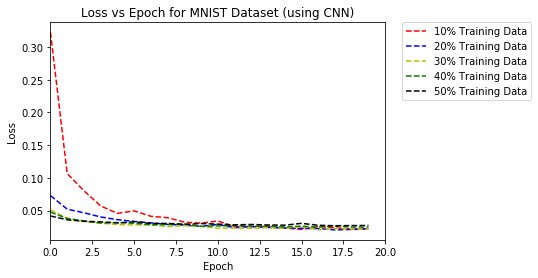

In [26]:
plt.plot(Loss1, 'r--', label = "10% Training Data")
plt.plot(Loss2, 'b--', label = "20% Training Data")
plt.plot(Loss3, 'y--', label = "30% Training Data")
plt.plot(Loss4, 'g--', label = "40% Training Data")
plt.plot(Loss5, 'k--', label = "50% Training Data")
plt.title("Loss vs Epoch for MNIST Dataset (using CNN)")
plt.xlim([0, num_epochs])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()